In [1]:
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
from s3fs import S3FileSystem, S3Map

import cmocean as cm

In [2]:
plt.rcParams['font.size']=14
plt.rcParams['axes.labelsize']='large'
plt.rcParams['pcolor.shading']='auto'

In [29]:
fs = S3FileSystem(anon=True)
aodn = fs.glob('imos-data/IMOS/ANFOG/REALTIME/slocum_glider/ScottReef*/*.nc')
for item in aodn:
    print(item)

imos-data/IMOS/ANFOG/REALTIME/slocum_glider/ScottReef120230424/IMOS_ANFOG_BCEOSTUV_20230424T222320Z_SL210_FV00_timeseries_END-20230518T231521Z.nc
imos-data/IMOS/ANFOG/REALTIME/slocum_glider/ScottReef220230424/IMOS_ANFOG_BCEOSTUV_20230424T222048Z_SL286_FV00_timeseries_END-20230519T014049Z.nc
imos-data/IMOS/ANFOG/REALTIME/slocum_glider/ScottReef320230424/IMOS_ANFOG_BCEOSTUV_20230425T225910Z_SL248_FV00_timeseries_END-20230520T015856Z.nc


In [32]:
def open_file_nocache(fname, myfs):
    """
    Load a netcdf file directly from an S3 bucket
    """
    fileobj = myfs.open(fname)
    return xr.open_dataset(fileobj)

# ds_all = open_mfile_nocache(aodn, fs)
ds_all0 = [open_file_nocache(ff, fs) for ff in aodn]
myds_all0 = [ds.where(ds['DEPTH']<10) for ds in ds_all0]
myds_all0[0]

<xarray.Dataset>
Dimensions:                    (TIME: 43549)
Coordinates:
  * TIME                       (TIME) datetime64[ns] 2023-04-24T22:23:20.8030...
    LATITUDE                   (TIME) float64 nan -12.87 ... -13.03 -13.04
    LONGITUDE                  (TIME) float64 nan 122.7 122.7 ... 122.7 122.7
    DEPTH                      (TIME) float64 nan -0.04971 ... 0.169 0.169
Data variables: (12/36)
    PLATFORM                   (TIME) object nan b'' b'' b'' ... b'' b'' b'' b''
    DEPLOYMENT                 (TIME) object nan b'' b'' b'' ... b'' b'' b'' b''
    SENSOR1                    (TIME) object nan b'' b'' b'' ... b'' b'' b'' b''
    SENSOR2                    (TIME) object nan b'' b'' b'' ... b'' b'' b'' b''
    SENSOR3                    (TIME) object nan b'' b'' b'' ... b'' b'' b'' b''
    SENSOR4                    (TIME) object nan b'' b'' b'' ... b'' b'' b'' b''
    ...                         ...
    IRRAD490                   (TIME) float64 nan 0.0 0.0 ... 2.074 2.455 35.91
    IRRAD490_quality_control   (TIME) float32 nan 0.0 0.0 0.0 ... 0.0 0.0 0.0
    IRRAD555                   (TIME) float64 nan 0.0 0.0 ... 1.97 2.077 56.17
    IRRAD555_quality_control   (TIME) float32 nan 0.0 0.0 0.0 ... 0.0 0.0 0.0
    IRRAD670                   (TIME) float64 nan 0.0 0.0 ... 2.291 1.881 32.49
    IRRAD670_quality_control   (TIME) float32 nan 0.0 0.0 0.0 ... 0.0 0.0 0.0
Attributes: (12/43)
    project:                       Integrated Marine Observing System (IMOS)
    institution:                   ANFOG (Australian National Facility for Oc...
    references:                    http://www.imos.org.au; "ANFOG Data Manage...
    naming_authority:              IMOS
    cdm_data_type:                 Trajectory
    data_centre:                   Australian Ocean Data Network (AODN)
    ...                            ...
    geospatial_lon_max:            123.9376
    geospatial_lat_min:            -13.0362
    geospatial_lat_max:            -12.6009
    time_coverage_start:           2023-04-24T22:23:20Z
    time_coverage_end:             2023-05-18T23:15:21Z
    history:                       2023-05-19T00:19:41Z Written by MATLAB scr...

In [21]:
ncfiles = ['/home/jupyter-mrayson/data/SWOT_Cruise/MTS-Glider/BO-MTS_Unit_481_200m_Met-Ocean_Glider_NetCDF/1000220002_py01_DT_20230327-20230527.nc',
'/home/jupyter-mrayson/data/SWOT_Cruise/MTS-Glider/BO-MTS_Unit_687_350m_Met-Ocean_Glider_NetCDF/1000220003_py01_DT_20230327-20230526.nc',
'/home/jupyter-mrayson/data/SWOT_Cruise/MTS-Glider/DSTG_Unit_355_200m_CTD_Glider_NetCDF/1000220000_py01_DT_20230326-20230526.nc']

# ds_all = open_mfile_nocache(aodn, fs)
ds_all = [xr.open_dataset(ff) for ff in ncfiles]
myds_all = [ds.where(ds['DEPTH']<10) for ds in ds_all]
myds_all[0]

<xarray.Dataset>
Dimensions:                              (TIME: 2175074)
Coordinates:
  * TIME                                 (TIME) datetime64[ns] 2023-03-28T00:...
    LONGITUDE                            (TIME) float64 122.1 122.1 ... 122.8
    LATITUDE                             (TIME) float64 -14.05 -14.05 ... -14.23
    DEPTH                                (TIME) float64 0.05965 ... 0.1591
Data variables: (12/78)
    TIME_quality_control                 (TIME) float32 0.0 0.0 0.0 ... 0.0 0.0
    m_depth                              (TIME) float64 nan nan nan ... nan nan
    m_depth_rate                         (TIME) float64 nan nan nan ... nan nan
    m_depth_state                        (TIME) float32 0.0 0.0 0.0 ... 0.0 0.0
    moving_battpos                       (TIME) float64 0.0 0.0 0.0 ... 0.0 0.0
    moving_de_pump                       (TIME) float64 0.0 0.0 0.0 ... 0.0 0.0
    ...                                   ...
    VCUR_GPS_quality_control             (TIME) float32 0.0 0.0 0.0 ... 0.0 0.0
    LONGITUDE_quality_control            (TIME) float32 1.0 1.0 1.0 ... 1.0 1.0
    LATITUDE_quality_control             (TIME) float32 1.0 1.0 1.0 ... 1.0 1.0
    DEPTH_quality_control                (TIME) float32 1.0 1.0 1.0 ... 1.0 1.0
    PHASE                                (TIME) float32 0.0 0.0 0.0 ... 0.0 0.0
    PHASE_quality_control                (TIME) float32 0.0 0.0 0.0 ... 0.0 0.0
Attributes: (12/29)
    project:                       DT MTS Project 10002200
    title:                         DT_Survey_1000220002_NETCDF4
    Conventions:                   CF-1.6,IMOS-1.4
    standard_name_vocabulary:      Version 72, 10 March 2020
    institution:                   Marine Tech Systems (MTS)
    date_created:                  2023-06-17 01:01:00.846640
    ...                            ...
    author:                        armstrong, curtis
    principal_investigator:        hollings, ben
    citation:                      Armstrong, C., Hollings, B., 2023, Survey ...
    acknowledgement:               Data was sourced from Blue Ocean Marine Te...
    disclaimer:                    Data, products and services from Blue Ocea...
    license:                       http://creativecommons.org/licenses/by/4.0/

In [22]:
from utils import plot_swot_basemap, open_mfile_nocache

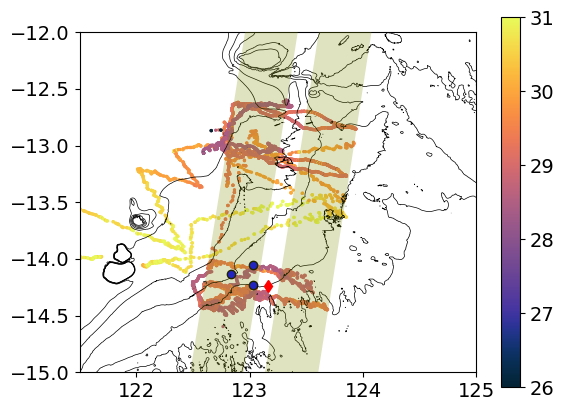

In [33]:
xlims = (121.5, 125)
ylims = (-15,-12)

plt.figure()
ax=plt.subplot(111)
plot_swot_basemap(ax, xlims, ylims)
ss=100
for myds in myds_all:
    plt.scatter(myds['LONGITUDE'][::ss],myds['LATITUDE'][::ss],c=myds['TEMP'][::ss],
               cmap='cmo.thermal', s=2, vmin=26, vmax=31)

ss=1
for myds in myds_all0:
    plt.scatter(myds['LONGITUDE'][::ss],myds['LATITUDE'][::ss],c=myds['TEMP'][::ss],
               cmap='cmo.thermal', s=2, vmin=26, vmax=31)
plt.colorbar()

plt.savefig('../FIGURES/MTS_Glider_SST_SWOT_Cruise.png', dpi=150)

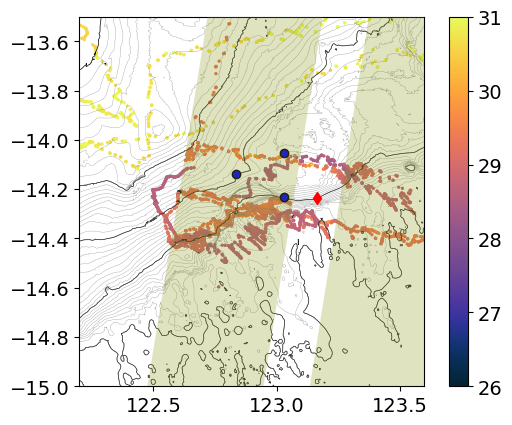

In [34]:
xlims = (122.2, 123.6)
ylims = (-15,-13.5)

plt.figure()
ax=plt.subplot(111)
plot_swot_basemap(ax, xlims, ylims, fine_contours=True)
ss=100
for myds in myds_all:
    plt.scatter(myds['LONGITUDE'][::ss],myds['LATITUDE'][::ss],c=myds['TEMP'][::ss],
               cmap='cmo.thermal', s=2, vmin=26, vmax=31)

ss=1
for myds in myds_all0:
    plt.scatter(myds['LONGITUDE'][::ss],myds['LATITUDE'][::ss],c=myds['TEMP'][::ss],
               cmap='cmo.thermal', s=2, vmin=26, vmax=31)
plt.colorbar()

plt.savefig('../FIGURES/MTS_Glider_SST_SWOT_Cruise_zoom01.png', dpi=150)

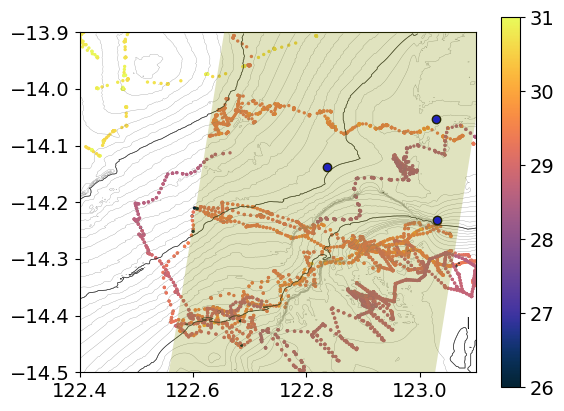

In [35]:
xlims = (122.4, 123.1)
ylims = (-14.5,-13.9)

plt.figure()
ax=plt.subplot(111)
plot_swot_basemap(ax, xlims, ylims, fine_contours=True)
ss=30
for myds in myds_all:
    plt.scatter(myds['LONGITUDE'][::ss],myds['LATITUDE'][::ss],c=myds['TEMP'][::ss],
               cmap='cmo.thermal', s=2, vmin=26, vmax=31)

ss=1
for myds in myds_all0:
    plt.scatter(myds['LONGITUDE'][::ss],myds['LATITUDE'][::ss],c=myds['TEMP'][::ss],
               cmap='cmo.thermal', s=2, vmin=26, vmax=31)
plt.colorbar()

plt.savefig('../FIGURES/MTS_Glider_SST_SWOT_Cruise_zoom01.png', dpi=150)

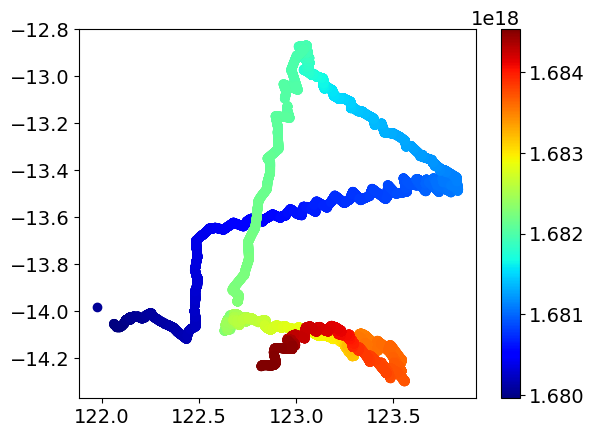

In [19]:
ss=100
plt.figure()
plt.scatter(myds['LONGITUDE'][::ss],myds['LATITUDE'][::ss],c=myds['TIME'][::ss],
           cmap='jet',
           )
plt.colorbar()

In [20]:
myds['TIME'][0:10]

<xarray.DataArray 'TIME' (TIME: 10)>
array(['2023-03-28T00:34:07.705719808', '2023-03-28T00:34:09.726099968',
       '2023-03-28T00:34:11.761050112', '2023-03-28T00:34:13.794129920',
       '2023-03-28T00:34:15.802489856', '2023-03-28T00:34:17.812559872',
       '2023-03-28T00:34:19.827760128', '2023-03-28T00:34:21.836270080',
       '2023-03-28T00:34:23.850370048', '2023-03-28T00:34:25.882290176'],
      dtype='datetime64[ns]')
Coordinates:
  * TIME       (TIME) datetime64[ns] 2023-03-28T00:34:07.705719808 ... 2023-0...
    LONGITUDE  (TIME) float64 122.1 122.1 122.1 122.1 ... 122.1 122.1 122.1
    LATITUDE   (TIME) float64 -14.05 -14.05 -14.05 ... -14.06 -14.06 -14.06
    DEPTH      (TIME) float64 0.05965 0.09942 0.03977 ... 0.1392 0.09942 0.02983
Attributes:
    standard_name:        time
    long_name:            time
    axis:                 T
    valid_min:            0.0
    valid_max:            90000.0
    source_variables:     sci_m_present_time
    comment:              UTC
    ancillary_variables:  TIME_quality_control
    observation_type:     measured
    quality_control_set:  1